In [2]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker

In [3]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [4]:
# Construction of the 0-pi Hamiltonian

def Hamiltonian_0pi(EJ,ECS,ECJ,EL,n,phi,alph):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    H1=4*ECS*((n_theta-n*Id_M)@(n_theta-n*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta[0][2*M]+=1
    cos_theta[2*M][0]+=1
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi/2)))
    H_I=EJ*np.kron(cos_theta,cos_phi.real)#SIN EL2 
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

In [5]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

N=20
a_phi=np.diag(np.sqrt(np.arange(1, N+1)), 1)
ad_phi=np.diag(np.sqrt(np.arange(1, N+1)), -1)
N_phi=ad_phi@a_phi
Id_N=np.eye(N+1)

# For theta

M=20
Id_M=np.eye(2*M+1)
n_theta=np.flipud(np.fliplr(np.diag(np.arange(-M,M+1), 0)))

#Qubit parameters 1 

E_Cs=1.0
E_Cj=1.0
E_L=1.0
E_J=1.0
alpha=(1j*(E_Cj/E_L)**(1.0/4.0))

# Qubit parameters 2

E_Cs_2=(1.0/20)
E_Cj_2=1.0
E_L_2=(1.0/16)
E_J_2=(1.0/5.0)
alpha2=(1j*(E_Cj_2/E_L_2)**(1.0/4.0))

# For calculations ng

ng1=np.arange(0.475,0.526,0.005) #0.025
ng2=np.arange(0.475,0.526,0.005) #0.025

# For calculations phiext
a=np.pi-0.15
b=np.pi+0.16
phi_ext1=np.arange(a,b,0.03) #0.15
phi_ext2=np.arange(a,b,0.03) #0.15

#2Darrays

PHI,NG=np.meshgrid(phi_ext1,ng1)
print(NG.shape[0])
print(NG.shape[1])
print(NG)
print(PHI)

Energies1_0=np.zeros_like(NG)
Energies1_1=np.zeros_like(NG)

Energies2_0=np.zeros_like(NG)
Energies2_1=np.zeros_like(NG)

11
11
[[0.475 0.475 0.475 0.475 0.475 0.475 0.475 0.475 0.475 0.475 0.475]
 [0.48  0.48  0.48  0.48  0.48  0.48  0.48  0.48  0.48  0.48  0.48 ]
 [0.485 0.485 0.485 0.485 0.485 0.485 0.485 0.485 0.485 0.485 0.485]
 [0.49  0.49  0.49  0.49  0.49  0.49  0.49  0.49  0.49  0.49  0.49 ]
 [0.495 0.495 0.495 0.495 0.495 0.495 0.495 0.495 0.495 0.495 0.495]
 [0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5  ]
 [0.505 0.505 0.505 0.505 0.505 0.505 0.505 0.505 0.505 0.505 0.505]
 [0.51  0.51  0.51  0.51  0.51  0.51  0.51  0.51  0.51  0.51  0.51 ]
 [0.515 0.515 0.515 0.515 0.515 0.515 0.515 0.515 0.515 0.515 0.515]
 [0.52  0.52  0.52  0.52  0.52  0.52  0.52  0.52  0.52  0.52  0.52 ]
 [0.525 0.525 0.525 0.525 0.525 0.525 0.525 0.525 0.525 0.525 0.525]]
[[2.99159265 3.02159265 3.05159265 3.08159265 3.11159265 3.14159265
  3.17159265 3.20159265 3.23159265 3.26159265 3.29159265]
 [2.99159265 3.02159265 3.05159265 3.08159265 3.11159265 3.14159265
  3.17159265 3.20159265 3.23159265 3.261

In [6]:
for i in range(NG.shape[0]):
    for j in range(NG.shape[1]):
        print("i=",i)
        print("j=",j)
        print("Step for ng = ",ng1[i],", phi_ext= ",phi_ext1[j])
        H1=Hamiltonian_0pi(E_J,E_Cs,E_Cj,E_L,ng1[i],phi_ext1[j],alpha)
        print("Hamiltonian built, len(H)=",len(H1)**2)
        #vals,vects=np.linalg.eigh(H)
        vals, _ = eigsh(H1, k=2, which='SA')
        #vals,_=np.linalg.eigh(H)
        print(vals[0],vals[1])
        print("Eigenvalues calculated")
        Energies1_0[i][j]+=vals[0]
        print("Energies1_0[",i,"][",j,"] = ",Energies1_0[i][j])
        Energies1_1[i][j]+=vals[1]
        print("Energies1_1[",i,"][",j,"] = ",Energies1_1[i][j])

i= 0
j= 0
Step for ng =  0.475 , phi_ext=  2.991592653589793
Hamiltonian built, len(H)= 741321
1.6791818241513783 1.8681488580444134
Eigenvalues calculated
Energies1_0[ 0 ][ 0 ] =  1.6791818241513783
Energies1_1[ 0 ][ 0 ] =  1.8681488580444134
i= 0
j= 1
Step for ng =  0.475 , phi_ext=  3.021592653589793
Hamiltonian built, len(H)= 741321
1.6823951660066818 1.8645266787389196
Eigenvalues calculated
Energies1_0[ 0 ][ 1 ] =  1.6823951660066818
Energies1_1[ 0 ][ 1 ] =  1.8645266787389196
i= 0
j= 2
Step for ng =  0.475 , phi_ext=  3.051592653589793
Hamiltonian built, len(H)= 741321
1.6849878935836684 1.8616157350088984
Eigenvalues calculated
Energies1_0[ 0 ][ 2 ] =  1.6849878935836684
Energies1_1[ 0 ][ 2 ] =  1.8616157350088984
i= 0
j= 3
Step for ng =  0.475 , phi_ext=  3.0815926535897926
Hamiltonian built, len(H)= 741321
1.6868946858116047 1.8594815215645326
Eigenvalues calculated
Energies1_0[ 0 ][ 3 ] =  1.6868946858116047
Energies1_1[ 0 ][ 3 ] =  1.8594815215645326
i= 0
j= 4
Step for ng =

In [7]:
print(Energies1_0)

[[1.67918182 1.68239517 1.68498789 1.68689469 1.68806226 1.68845553
  1.68806226 1.68689469 1.68498789 1.68239517 1.67918182]
 [1.69356596 1.69743898 1.7006127  1.70297842 1.70444164 1.70493716
  1.70444164 1.70297842 1.7006127  1.69743898 1.69356596]
 [1.7070354  1.71181879 1.71584484 1.71892238 1.72086447 1.72152963
  1.72086447 1.71892238 1.71584484 1.71181879 1.7070354 ]
 [1.71879093 1.72480659 1.7301187  1.73439717 1.73722956 1.738229
  1.73722956 1.73439717 1.7301187  1.72480659 1.71879093]
 [1.72735292 1.73477842 1.74185883 1.74823001 1.7530936  1.75503113
  1.7530936  1.74823001 1.74185883 1.73477842 1.72735292]
 [1.73060805 1.73877518 1.74699227 1.75525816 1.76357168 1.77193164
  1.76357168 1.75525816 1.74699227 1.73877518 1.73060805]
 [1.72735292 1.73477842 1.74185883 1.74823001 1.7530936  1.75503113
  1.7530936  1.74823001 1.74185883 1.73477842 1.72735292]
 [1.71879093 1.72480659 1.7301187  1.73439717 1.73722956 1.738229
  1.73722956 1.73439717 1.7301187  1.72480659 1.718790

In [8]:
for i in range(NG.shape[0]):
    for j in range(NG.shape[1]):
        print("Step for ng = ",ng2[i],", phi_ext= ",phi_ext2[j])
        H2=Hamiltonian_0pi(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng2[i],phi_ext2[j],alpha2)
        print("Hamiltonian built, len(H)=",len(H2)**2)
        #vals,vects=np.linalg.eigh(H)
        vals2, _ = eigsh(H2, k=2, which='SA')
        #vals,_=np.linalg.eigh(H)
        print(vals2[0],vals2[1])
        print("Eigenvalues calculated")
        Energies2_0[i][j]+=vals2[0]
        print("Energies2_0[",i,"][",j,"] = ",Energies2_0[i][j])
        Energies2_1[i][j]+=vals2[1]
        print("Energies2_1[",i,"][",j,"] = ",Energies2_1[i][j])

Step for ng =  0.475 , phi_ext=  2.991592653589793
Hamiltonian built, len(H)= 741321
0.26997367754808144 0.2805515378854335
Eigenvalues calculated
Energies2_0[ 0 ][ 0 ] =  0.26997367754808144
Energies2_1[ 0 ][ 0 ] =  0.2805515378854335
Step for ng =  0.475 , phi_ext=  3.021592653589793
Hamiltonian built, len(H)= 741321
0.270112880618662 0.2804021995725632
Eigenvalues calculated
Energies2_0[ 0 ][ 1 ] =  0.270112880618662
Energies2_1[ 0 ][ 1 ] =  0.2804021995725632
Step for ng =  0.475 , phi_ext=  3.051592653589793
Hamiltonian built, len(H)= 741321
0.2702241355708076 0.28028305220449024
Eigenvalues calculated
Energies2_0[ 0 ][ 2 ] =  0.2702241355708076
Energies2_1[ 0 ][ 2 ] =  0.28028305220449024
Step for ng =  0.475 , phi_ext=  3.0815926535897926
Hamiltonian built, len(H)= 741321
0.2703053146114324 0.2801962306582953
Eigenvalues calculated
Energies2_0[ 0 ][ 3 ] =  0.2703053146114324
Energies2_1[ 0 ][ 3 ] =  0.2801962306582953
Step for ng =  0.475 , phi_ext=  3.1115926535897924
Hamiltoni

In [9]:
print(Energies2_0)

[[0.26997368 0.27011288 0.27022414 0.27030531 0.27035474 0.27037134
  0.27035474 0.27030531 0.27022414 0.27011288 0.26997368]
 [0.27081399 0.27098311 0.27111993 0.27122078 0.27128264 0.2713035
  0.27128264 0.27122078 0.27111993 0.27098311 0.27081399]
 [0.2716157  0.27182784 0.2720033  0.27213522 0.27221737 0.2722453
  0.27221737 0.27213522 0.2720033  0.27182784 0.2716157 ]
 [0.27233571 0.27261046 0.27284779 0.27303426 0.27315482 0.27319672
  0.27315482 0.27303426 0.27284779 0.27261046 0.27233571]
 [0.27288214 0.2732375  0.27357056 0.27386221 0.27407596 0.27415776
  0.27407596 0.27386221 0.27357056 0.2732375  0.27288214]
 [0.2730982  0.27350148 0.27390623 0.27431235 0.27471978 0.27512841
  0.27471978 0.27431235 0.27390623 0.27350148 0.2730982 ]
 [0.27288214 0.2732375  0.27357056 0.27386221 0.27407596 0.27415776
  0.27407596 0.27386221 0.27357056 0.2732375  0.27288214]
 [0.27233571 0.27261046 0.27284779 0.27303426 0.27315482 0.27319672
  0.27315482 0.27303426 0.27284779 0.27261046 0.2723

GROUND STATE & 1ST EXCITED STATE JOINT 3D PLOT AND SEPARATED COLORMAPS (1)

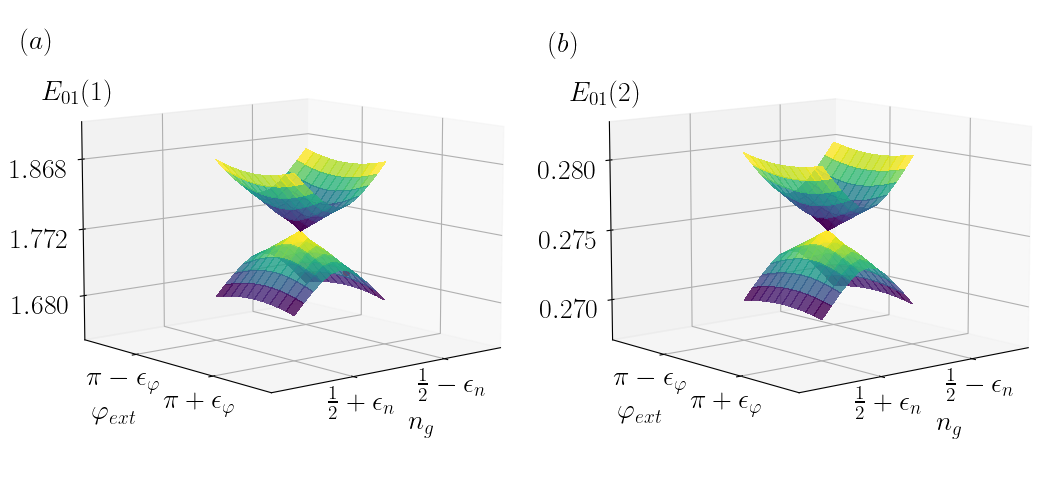

In [13]:
# Create the figure and subplots
fig = plt.figure(figsize=(13, 6))

# Plot 1: 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(NG,PHI, Energies1_0, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
surf2 = ax1.plot_surface(NG,PHI, Energies1_1, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
#ax1.set_xlabel('$n_g$')
#ax1.set_ylabel(r'$\varphi_{ext}$')
#ax1.set_zlabel('$E_{01} (1)$')
ax1.set_xlim(0.445,0.565)
ax1.set_ylim(np.pi-0.35,np.pi+0.35)
ax1.set_zlim(1.4244+0.2,2.1730-0.26)
ax1.text(0.59,2.8,1.955,r'$E_{01} (1)$', fontsize=20)
ax1.text(0.51,3.6,1.55,r'$n_g$', fontsize=20)
ax1.text(0.64,3.4,1.61,r'$\varphi_{ext}$', fontsize=20)
ax1.set_xticks([0.475,0.525],[r'$\frac{1}{2}-\epsilon_n$',r'$\frac{1}{2}+\epsilon_n$'])
ax1.set_yticks([2.9916,3.2916],[r'$\pi - \epsilon_{\varphi}$',r'$\pi + \epsilon_{\varphi}$'])
ax1.set_zticks([1.680,1.772,1.868],['$1.680$','$1.772$','$1.868$'])
ax1.tick_params(axis='x', pad=-2.0)
ax1.tick_params(axis='y', pad=2.0)
ax1.tick_params(axis='z', pad=10.0)
ax1.text(0.6,2.8,2.025,r'$(a)$', fontsize=20)
ax1.scatter([0.5],[np.pi+0.17],[1.730], color='red')
ax1.view_init(10, 50)

# Plot 1: 3D surface plot
ax2 = fig.add_subplot(122, projection='3d')
surff1 = ax2.plot_surface(NG,PHI,Energies2_0, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
surff2 = ax2.plot_surface(NG,PHI, Energies2_1, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
#ax2.set_xlabel('$n_g$')
#ax2.set_ylabel(r'$\varphi_{ext}$')
#ax2.set_zlabel('$E_{01} (1)$')
ax2.set_xlim(0.445,0.565)
ax2.set_ylim(np.pi-0.35,np.pi+0.35)
ax2.set_zlim(0.2564+0.011,0.2984-0.016)
ax2.text(0.59,2.8,0.2845,r'$E_{01} (2)$', fontsize=20)
ax2.text(0.51,3.6,0.2635,r'$n_g$', fontsize=20)
ax2.text(0.63,3.31,0.266,r'$\varphi_{ext}$', fontsize=20)
ax2.set_xticks([0.475,0.525],[r'$\frac{1}{2}-\epsilon_n$',r'$\frac{1}{2}+\epsilon_n$'])
ax2.set_yticks([2.9916,3.2916],[r'$\pi - \epsilon_{\varphi}$',r'$\pi + \epsilon_{\varphi}$'])
ax2.set_zticks([0.27,0.275,0.28],['$0.270$','$0.275$','$0.280$'])
ax2.tick_params(axis='x', pad=-2.0)
ax2.tick_params(axis='y', pad=2.0)
ax2.tick_params(axis='z', pad=10.0)
ax2.text(0.6,2.8,0.288,r'$(b)$', fontsize=20)
ax2.view_init(10, 50)

# Adjust the spacing between subplots
fig.subplots_adjust(wspace=0.1)

# Show the figure
#plt.savefig('E01_1&2_DEF_PRUEBA1.png',dpi=300,bbox_inches='tight')
plt.show()

GROUND STATE & 1ST EXCITED STATE JOINT 3D PLOT AND SEPARATED COLORMAPS (2)

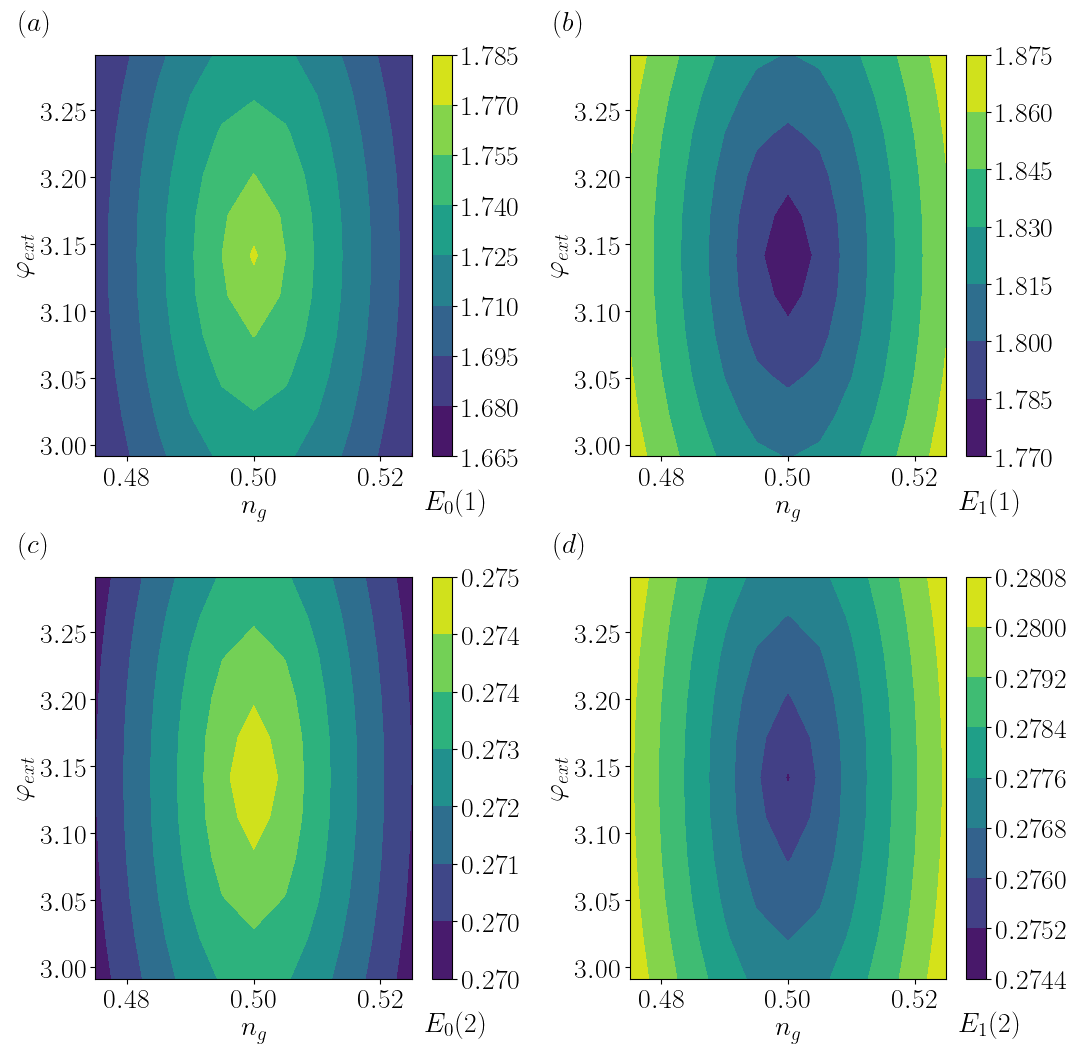

In [14]:
# Create the figure and subplots
fig = plt.figure(figsize=(12, 12))

# Plot 2: First contour plot
ax21 = fig.add_subplot(221)
contour1 = ax21.contourf(NG,PHI, Energies1_0, cmap="viridis")
plt.axis('tight')
ax21.set_xlabel(r'$n_g$')
ax21.set_ylabel(r'$\varphi_{ext}$')
ax21.text(0.527,2.952,r'$E_0 (1)$', fontsize=20)
ax21.text(0.463,3.31,r'$(a)$', fontsize=20)
colorbar1 = plt.colorbar(contour1, ax=ax21)
#colorbar1.set_label('$E_0 (1)$')

# Plot 3: Second contour plot
ax31 = fig.add_subplot(222)
contour2 = ax31.contourf(NG, PHI, Energies1_1, cmap="viridis")
plt.axis('tight')
ax31.set_xlabel('$n_g$')
ax31.set_ylabel(r'$\varphi_{ext}$')
ax31.text(0.527,2.952,r'$E_1 (1)$', fontsize=20)
ax31.text(0.463,3.31,r'$(b)$', fontsize=20)
colorbar2 = plt.colorbar(contour2, ax=ax31)
#colorbar2.set_label('$E_1 (1)$')

# Plot 2: First contour plot
ax22 = fig.add_subplot(223)
contour3 = ax22.contourf(NG, PHI, Energies2_0, cmap="viridis")
plt.axis('tight')
ax22.set_xlabel(r'$n_g$')
ax22.set_ylabel(r'$\varphi_{ext}$')
ax22.text(0.527,2.952,r'$E_0 (2)$', fontsize=20)
ax22.text(0.463,3.31,r'$(c)$', fontsize=20)
colorbar1 = plt.colorbar(contour3, ax=ax22)
#colorbar1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))  # Set 2 decimal places
colorbar1.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.3f$'))

#colorbar1.set_label('$E_0 (2)$')

# Plot 3: Second contour plot
ax32 = fig.add_subplot(224)
contour4 = ax32.contourf(NG, PHI, Energies2_1, cmap="viridis")
plt.axis('tight')
ax32.set_xlabel('$n_g$')
ax32.set_ylabel(r'$\varphi_{ext}$')
ax32.text(0.527,2.952,r'$E_1 (2)$', fontsize=20)
ax32.text(0.463,3.31,r'$(d)$', fontsize=20)
colorbar2 = plt.colorbar(contour4, ax=ax32)
#colorbar2.set_label('$E_1 (2)$')

# Adjust the spacing between subplots
fig.subplots_adjust(wspace=0.35,hspace=0.3)

# Show the figure
#plt.savefig('E01_1&2_CMAP_DEF_PRUEBA1.png',dpi=300,bbox_inches='tight')
plt.show()